In [1]:
from Models.strict_s_shape import Strict_S_Shape
from Models.s_shape_silva_linear import S_Shape_Silva_Linear
from Results.results import compare_two_models

In [2]:
from Functions.instance_generation import generate_instances
from Models.strict_s_shape import Strict_S_Shape
from Models.s_shape_silva_linear import S_Shape_Silva_Linear

possible_instances = [[3], # aisle numbers
                      [3], # bay numbers
                      [1,3], # order numbers 
                      [3,4], # order sizes 
                      2, # slot capacity
                      1, # between aisle distance
                      1] # between bay distance
                      
all_instances = generate_instances(possible_instances[0],
                                   possible_instances[1],
                                   possible_instances[2],
                                   possible_instances[3],
                                   possible_instances[4],
                                   possible_instances[5],
                                   possible_instances[6])


model1_distances = []
model1_runtimes = []
model2_distances = []
model2_runtimes = []
instance_sizes = []

for i in range(len(all_instances)):
    instance = all_instances[i]
    _, model1_distance, model1_runtime, _ = Strict_S_Shape(**instance)
    
    _, model2_distance, model2_runtime, _ = S_Shape_Silva_Linear(**instance)
    
    instance_size = instance["num_aisles"] * instance["num_bays"] * len(instance["orders"]) * len(instance["orders"][1])

    model1_distances.append(model1_distance)
    model1_runtimes.append(round(model1_runtime,3))
    model2_distances.append(model2_distance)
    model2_runtimes.append(round(model2_runtime,3))
    instance_sizes.append(instance_size)

Set parameter ServerPassword
Set parameter TokenServer to value "10.42.67.199"


In [3]:
print(model1_distances)
print(model1_runtimes)

[10.0, 10.0, 30.0, 30.0]
[0.017, 0.002, 0.01, 0.01]


In [4]:
# creating the metrics

distance_gaps = []
fractional_distance_gaps = []
runtime_gaps = []
fractional_runtime_gaps = []


for i in range(len(model1_distances)):
    distance_gaps.append(model1_distances[i] - model2_distances[i])
    fractional_distance_gaps.append(round((model1_distances[i] - model2_distances[i])/model2_distances[i],2))
    runtime_gaps.append(round(model2_runtimes[i] - model1_runtimes[i],2))
    fractional_runtime_gaps.append(round((model2_runtimes[i] - model1_runtimes[i])/model1_runtimes[i]))

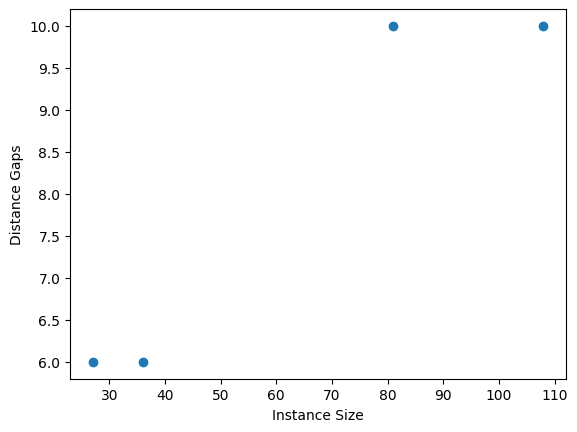

In [5]:
import matplotlib.pyplot as plt

plt.xlabel("Instance Size")
plt.ylabel("Distance Gaps")
plt.scatter(instance_sizes, distance_gaps)


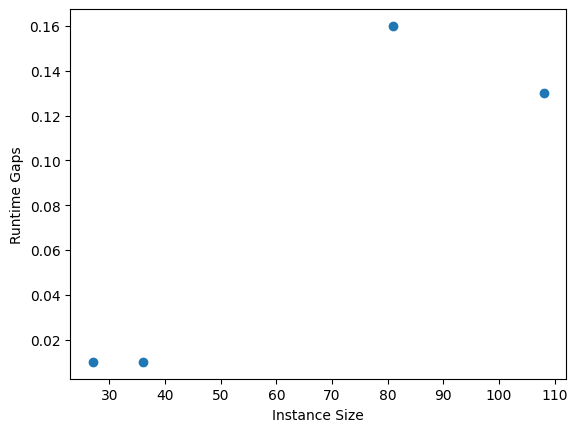

In [6]:
plt.xlabel("Instance Size")
plt.ylabel("Runtime Gaps")
plt.scatter(instance_sizes, runtime_gaps)

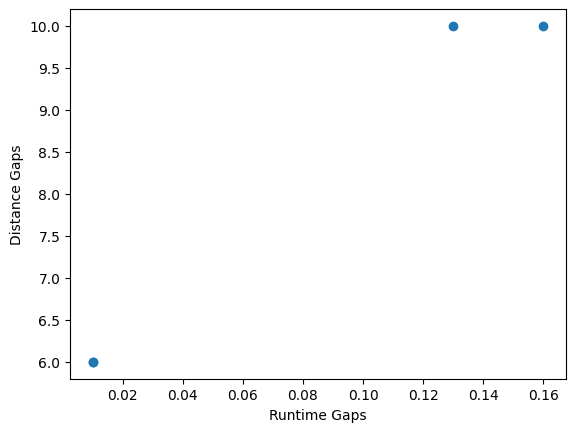

In [7]:
plt.xlabel("Runtime Gaps")
plt.ylabel("Distance Gaps")
plt.scatter(runtime_gaps, distance_gaps)